SANE Seydou
                                                                                                             

# Prediction part

In [290]:
import pandas as pd
from pandas import DataFrame
import urllib.request
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQVtdpXMHB4g9h75a0jw8CsrqSuQmP5eMIB2adpKR5hkRggwMwzFy5kB-AIThodhVHNLxlZYm8fuoWj/pub?gid=2105854808&single=true&output=csv'
data= urllib.request.urlopen(url)
velo = pd.read_csv(data)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0,NaN,NaN
3,12/03/2020,14:30:00,441.0,441.0,NaN,NaN
4,13/03/2020,10:02:00,1921.0,385.0,NaN,NaN
...,...,...,...,...,...,...
1498,31/03/2021,09:50:00,109211.0,444.0,NaN,NaN
1499,31/03/2021,15:04:00,109811.0,1044.0,NaN,NaN
1500,31/03/2021,16:27:00,109971.0,1204.0,NaN,NaN
1501,31/03/2021,17:00:00,110050.0,1283.0,NaN,NaN


In [291]:
##Vérification du nombre de données manquantes par colonnes
velo.isnull().sum()

Date                                            2
Heure / Time                                    4
Vélos depuis le 1er janvier / Grand total       2
Vélos ce jour / Today's total                   2
Unnamed: 4                                   1503
Remarque                                     1502
dtype: int64

In [292]:
##Suppression des colonnes avec plus de 50% de données manquantes
column_with_nan = velo.columns[velo.isnull().any()]
for column in column_with_nan:
          if velo[column].isnull().sum()*100.0/velo.shape[0] > 50:
                velo.drop(column,1, inplace=True)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
...,...,...,...,...
1498,31/03/2021,09:50:00,109211.0,444.0
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0


In [293]:
##Suppression des lignes avec des données manquantes
index_with_nan = velo.index[velo.isnull().any(axis=1)]
velo.drop(index_with_nan,0, inplace=True)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
5,13/03/2020,14:15:00,2305.0,769.0
6,13/03/2020,18:21:00,2822.0,1286.0
...,...,...,...,...
1498,31/03/2021,09:50:00,109211.0,444.0
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0


In [296]:
#velo.replace([Date], date)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
5,13/03/2020,14:15:00,2305.0,769.0
6,13/03/2020,18:21:00,2822.0,1286.0
...,...,...,...,...
1498,31/03/2021,09:50:00,109211.0,444.0
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0


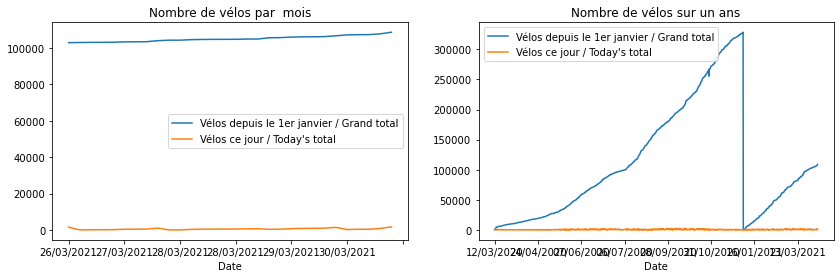

In [232]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
velo.iloc[-30:].set_index('Date').plot(ax=ax[0])
velo.set_index('Date').plot(ax=ax[1])
ax[0].set_title("Nombre de vélos par  mois")
ax[1].set_title("Nombre de vélos sur un ans");

In [316]:
from statsmodels.tsa.tsatools import lagmat
lag = 8
X = lagmat(velo["Vélos ce jour / Today's total"], lag)
lagged = velo.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
lagged.tail()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
1498,31/03/2021,09:50:00,109211.0,444.0,364.0,1703.0,835.0,390.0,371.0,249.0,1440.0,997.0
1499,31/03/2021,15:04:00,109811.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0,249.0,1440.0
1500,31/03/2021,16:27:00,109971.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0,249.0
1501,31/03/2021,17:00:00,110050.0,1283.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0
1502,31/03/2021,17:13:00,110092.0,1325.0,1283.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0


In [302]:
X = lagged.drop(["Date", "Heure / Time", "Vélos depuis le 1er janvier / Grand total"], axis=1)
Y = lagged["Vélos ce jour / Today's total"]
X.shape, Y.shape

((1499, 9), (1499,))

In [303]:
from numpy import corrcoef
corrcoef(X)

array([[ 1.        ,  0.96944396,  0.58763422, ...,  0.3551173 ,
         0.33243846,  0.29132635],
       [ 0.96944396,  1.        ,  0.7620779 , ...,  0.41316885,
         0.39980061,  0.35529038],
       [ 0.58763422,  0.7620779 ,  1.        , ...,  0.40170064,
         0.49096452,  0.45978428],
       ...,
       [ 0.3551173 ,  0.41316885,  0.40170064, ...,  1.        ,
         0.21933676, -0.17117196],
       [ 0.33243846,  0.39980061,  0.49096452, ...,  0.21933676,
         1.        ,  0.1858927 ],
       [ 0.29132635,  0.35529038,  0.45978428, ..., -0.17117196,
         0.1858927 ,  1.        ]])

In [304]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression()

In [305]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [306]:
from sklearn.metrics import r2_score
r2_score(Y, clr.predict(X))

1.0

In [307]:
clr.coef_

array([ 1.00000000e+00,  2.62570034e-16, -7.35759723e-17, -2.67367963e-16,
       -6.67093106e-17, -1.63090751e-16, -3.41166238e-16, -5.14050655e-17,
        1.97201664e-16])

In [310]:
for i in range(1, X.shape[1]):
    print("X(t-%d)" % (i), r2_score(Y, X.iloc[:, i]))

X(t-1) 0.18787383603102037
X(t-2) -0.24478155504146004
X(t-3) -0.35106839958453206
X(t-4) -0.4035610851557103
X(t-5) -0.40624960805085486
X(t-6) -0.4439778804347525
X(t-7) -0.45610527081052443
X(t-8) -0.4295169483222594


# Partie visualisation

In [312]:
import pandas as pd
from pandas import DataFrame
import json
import urllib.request
import urllib.parse as par
url1='https://data.montpellier3m.fr/sites/default/files/ressources/MMM_EcoCompt_X2H20042633.json'
data1= urllib.request.urlopen(url1)
velo1=pd.read_json(data1)
velo1


,intensity,laneId,dateObserved,location,id,type,vehicleType,reversedLane
coordinates,849,734202564,2021-03-30T00:00:00/2021-03-31T00:00:00,"[3.8336, 43.61465]",MMM_EcoCompt_X2H20042633_202103300000,TrafficFlowObserved,bicycle,False
type,849,734202564,2021-03-30T00:00:00/2021-03-31T00:00:00,Point,MMM_EcoCompt_X2H20042633_202103300000,TrafficFlowObserved,bicycle,False


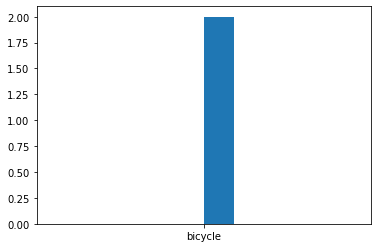

In [156]:
import matplotlib.pyplot as plt
plt.hist(velo1["vehicleType"])
plt.show()

AttributeError: 'Rectangle' object has no property 'figsize'

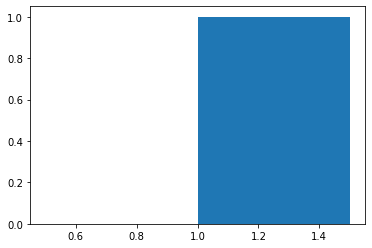

In [315]:
import matplotlib.pyplot as plt
fig, ax = plt.hist(1, 2, figsize=(14, 4))
velo1.iloc[-30:].set_index('intensity').plot(ax=ax[0])
velo1.set_index('intensity').plot(ax=ax[1])
ax[0].set_title("Nombre de vélos par  mois")
ax[1].set_title("Nombre de vélos sur un ans");